# Kmeans Clustering Technique
- Applicable primarily for continuous columns since uses Euclidean Distances
- As a first step, plot the scatter plot between the first 2 features
- Decide the number of clusters based on visuals
- Decide the number of clusters using elbow Method

In [1]:
import pandas
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [6,4]
plt.style.use('ggplot')

In [2]:
df = pandas.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\iris.csv')

In [3]:
df.head()

,Unnamed: 0,Species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,0.0,5.1,3.5,1.4,0.2
1,1,0.0,4.9,3.0,1.4,0.2
2,2,0.0,4.7,3.2,1.3,0.2
3,3,0.0,4.6,3.1,1.5,0.2
4,4,0.0,5.0,3.6,1.4,0.2


In [4]:
df.columns

Index(['Unnamed: 0', 'Species', 'sepal length (cm)', 'sepal width (cm)',
       'petal length (cm)', 'petal width (cm)'],
      dtype='object')

In [5]:
df.drop([df.columns[0]], axis = 1, inplace=True)

In [6]:
df.columns = ['Species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
df.head(3)

,Species,sepal_length,sepal_width,petal_length,petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2


In [8]:
#Apply minmax scaler to scale the features first

In [9]:
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `X` and `y` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

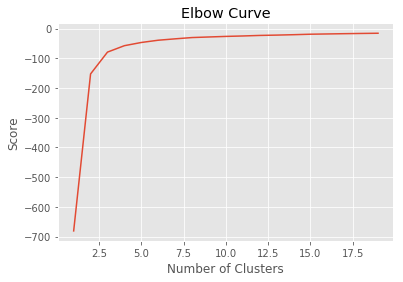

In [10]:
import matplotlib.pyplot as pl
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# When we graph the plot, we see that the graph levels off rapidly after 3 
# clusters, implying that addition of more clusters do not explain much more 
# of the variance in our relevant variable; in this case stock returns.

In [11]:
kmeans   = KMeans(n_clusters=3, max_iter=500, random_state=100)

y_kmeans = kmeans.fit_predict(X)

In [12]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [13]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [14]:
# Centroid values
kmeans.cluster_centers_
#used to understand how different clusters are varying according each feature

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
(X[y_kmeans == 0, 0]) #sepal length of all the flowers which have been clustered into 0 cluster

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [16]:
len(X[y_kmeans == 1, 0])

62

In [17]:
len(X[y_kmeans == 2, 0])

38

In [18]:
X[y_kmeans == 0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

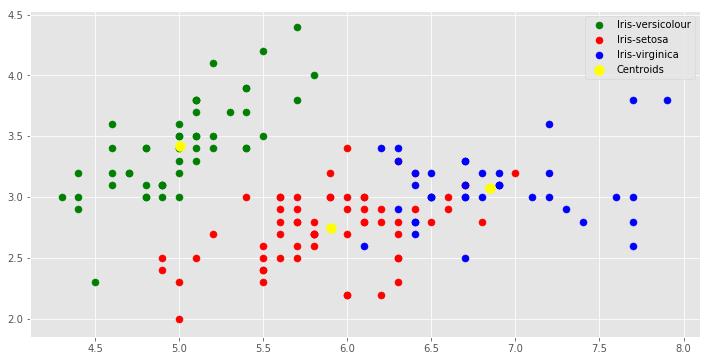

In [19]:
#Visualising the clusters
plt.figure(figsize=(12, 6))
#0th col on x axis and 1th col on y axis
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'blue', label = 'Iris-virginica');

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids')

plt.legend()

In [20]:
kmeans.n_iter_

6

Text(0, 0.5, 'WCSS')

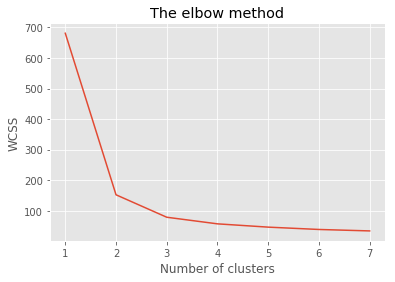

In [21]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares i.e inertia - same as error
#inertia is sum of sq distances of sample with the cluster center

for i in range(1, 8):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(X)
    
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 8), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

In [22]:
kmeans.inertia_

34.19068792479662

In [23]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479662]

In [24]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 7,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}